In [1]:
import pandas as pd
import networkx as nx
import pickle
import numpy as np
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

In [2]:
tissue_samples = pd.read_csv('GTEx_v7_Annotations_SampleAttributesDS.txt', sep = '\t')
tissue_list = tissue_samples.loc[tissue_samples['SMTSD'] == 'Muscle - Skeletal']['SAMPID'].to_numpy()
tissue_list

array(['GTEX-1117F-0426-SM-5EGHI', 'GTEX-111CU-2026-SM-5GZZC',
       'GTEX-111FC-0326-SM-5GZZ1', 'GTEX-111VG-2626-SM-5GZY2',
       'GTEX-111YS-2326-SM-5987L', 'GTEX-1122O-2426-SM-5GIDN',
       'GTEX-1128S-2426-SM-5H11B', 'GTEX-113JC-2726-SM-5EGIS',
       'GTEX-117XS-2526-SM-5H11G', 'GTEX-117YW-2426-SM-5Q5AE',
       'GTEX-117YX-2526-SM-5EQ4Q', 'GTEX-1192X-0426-SM-5GIEE',
       'GTEX-11DXW-0726-SM-5H12J', 'GTEX-11DXX-2726-SM-5PNXO',
       'GTEX-11DXY-2726-SM-5GID2', 'GTEX-11DXZ-2426-SM-5N9DT',
       'GTEX-11DZ1-0926-SM-5EQ5R', 'GTEX-11EI6-0326-SM-5EQ6G',
       'GTEX-11EM3-2126-SM-5H11M', 'GTEX-11EMC-2626-SM-59864',
       'GTEX-11EQ8-0526-SM-5N9BC', 'GTEX-11EQ9-2126-SM-5PNVW',
       'GTEX-11GS4-2526-SM-5A5KT', 'GTEX-11GSO-2526-SM-5PNVX',
       'GTEX-11GSP-2726-SM-5A5LJ', 'GTEX-11H98-0326-SM-5HL4S',
       'GTEX-11I78-2426-SM-5A5K9', 'GTEX-11LCK-1226-SM-5Q5AM',
       'GTEX-11NSD-2026-SM-5HL5U', 'GTEX-11NUK-0226-SM-5A5L4',
       'GTEX-11NV4-0326-SM-5HL58', 'GTEX-11O72-0326-SM-

In [3]:
columns_data = pd.read_csv('GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct', index_col = 'Name', sep = '\t', header = 2 , nrows = 2)
available_cols = columns_data.columns
common_columns = list(set(available_cols).intersection(tissue_list))
len(common_columns)

564

In [42]:
#cols = [ i for i in range(200)]
#print(cols)
dataset = pd.read_csv('GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct', usecols = common_columns, sep = '\t', header = 2 , nrows = 500)
#dataset = dataset1.drop('Description', axis = 1)
print(len(dataset))

for i in dataset.index.values:
    if np.sum(dataset.loc[i].values) == 0.0:
        dataset = dataset.drop(i, axis=0)
            
len(dataset)

500


491

In [43]:
new_dataset = pd.DataFrame()
new_dataset['Name'] = dataset.index.values
new_dataset = new_dataset.set_index('Name')
seed = 0
for col in dataset.columns:
    np.random.seed(seed)
    seed += 1
    permuted_values = dataset[col].to_list()
    np.random.shuffle(permuted_values)
    new_dataset[col] = permuted_values
    
new_dataset

,GTEX-1117F-0426-SM-5EGHI,GTEX-111CU-2026-SM-5GZZC,GTEX-111FC-0326-SM-5GZZ1,GTEX-111VG-2626-SM-5GZY2,GTEX-111YS-2326-SM-5987L,GTEX-1122O-2426-SM-5GIDN,GTEX-1128S-2426-SM-5H11B,GTEX-113JC-2726-SM-5EGIS,GTEX-117XS-2526-SM-5H11G,GTEX-117YW-2426-SM-5Q5AE,...,GTEX-ZYFC-0526-SM-5GIDF,GTEX-ZYFD-0326-SM-5NQ8I,GTEX-ZYFG-2426-SM-5GIE8,GTEX-ZYT6-1626-SM-5E45R,GTEX-ZYVF-0626-SM-5E43Q,GTEX-ZYW4-0526-SM-5GZZ5,GTEX-ZYY3-0526-SM-5E45G,GTEX-ZZ64-1526-SM-5E43K,GTEX-ZZPT-0626-SM-5GZXT,GTEX-ZZPU-2626-SM-5E45Y
Name,,,,,,,,,,,,,,,,,,,,,
0,0.5603,13.39000,2.91700,0.05643,12.69000,0.55260,0.0000,0.00000,0.00000,0.00000,...,2.83800,0.0000,0.0000,0.000,3.4590,0.04839,0.0000,101.90000,0.49060,0.1463
1,0.3652,0.20750,0.00000,0.16930,0.00000,20.80000,0.0000,0.00000,9.03900,0.09459,...,0.09023,0.0000,0.0000,0.000,28.6200,13.24000,1.8330,0.00000,0.00000,0.1453
2,11.9000,0.00000,0.04680,178.20000,18.15000,0.05663,0.2203,6.58000,0.41240,89.82000,...,25.91000,0.0000,3.8160,3.520,0.0000,0.00000,0.1356,6.40000,36.06000,0.0000
3,17.4500,0.01906,37.64000,91.59000,0.11990,18.30000,27.5400,0.07765,0.07823,0.56330,...,0.00000,10.0300,0.0000,0.000,26.3200,1.51100,0.0000,0.04353,0.00000,0.1837
4,0.3351,0.80760,0.21570,0.11410,0.19440,0.04267,0.0000,12.88000,0.11550,5.36500,...,0.38220,8.4270,0.0000,1.427,45.0200,0.13450,0.0000,5.35000,35.28000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0000,0.00000,1.45800,0.00000,0.00000,23.40000,0.2188,2.12000,0.23320,0.07851,...,0.00000,0.2663,0.0000,1.024,0.7460,0.30180,127.6000,0.00000,0.70980,0.5245
496,1.0110,0.04821,0.09169,28.53000,0.01085,0.00000,4.5190,0.77750,19.62000,46.74000,...,0.03035,0.3382,1.3810,0.000,0.0000,16.27000,0.0000,415.30000,0.74860,158.0000
497,0.4238,0.00000,0.17200,47.35000,1.09100,0.28850,5.2420,0.09480,11.22000,0.00000,...,0.00000,24.9300,5.0120,2.820,33.9500,0.00000,0.0000,5.50700,0.00000,0.1855


In [44]:
def get_total_discoveries(bootstrapped_individuals):

    #individuals = dataset.index.values

    p_values = []
    corr_values = []
    alphas = [i*0.1 for i in range(10)]

    count = 0
    for i in bootstrapped_individuals:
        for j in bootstrapped_individuals:

            count = count + 1
            if(count%10000 == 0):
                print(count)

            gene1 = dataset.loc[i].values
            gene2 = dataset.loc[j].values

            corr, p = spearmanr(gene1, gene2) #calculated spearman correlation for each pair

            corr_values.append(corr)
            p_values.append(p)

            
    total_discoveries = []
    for alpha in alphas:
        results = multipletests(p_values, alpha = alpha, method = 'fdr_bh')
        corrected_pvalues = results[1]
        rejects = results[0]
        total_discoveries.append(np.sum(np.array(rejects) == False))
            
    return total_discoveries

In [47]:
def get_false_positives(bootstrapped_individuals):
    
    #individuals = new_dataset.index.values

    p_values = []
    corr_values = []
    alphas = [i*0.1 for i in range(10)] 
    
    count = 0
    for i in bootstrapped_individuals:
        for j in bootstrapped_individuals:

            count = count + 1
            if(count%10000 == 0):
                print(count)

            gene1 = new_dataset.loc[i].values
            gene2 = new_dataset.loc[j].values

            corr, p = spearmanr(gene1, gene2) #calculated spearman correlation for each pair

            corr_values.append(corr)
            p_values.append(p)

    false_positives = []
    for alpha in alphas:
        false_positives.append(np.sum(np.array(p_values) > alpha))
    
    return false_positives

In [49]:
def get_empirical_fdr(bootstrapped_individuals):
       
    empirical_fdrs = []

    total_discoveries = get_total_discoveries(bootstrapped_individuals)
    false_positives = get_false_positives(bootstrapped_individuals)
    
    print(false_positives)
    print(total_discoveries)
    
    for i in range(len(total_discoveries)):
        empirical_fdrs.append(false_positives[i] * 1.0 / total_discoveries[i] )

    return list(empirical_fdrs)

In [51]:
def get_bootstrapped_individuals():
    
    individuals = dataset.index.values
    bootstrapped_individuals = np.random.choice(individuals, len(individuals), replace=True)  #Get bootstrapped samples
    
    return bootstrapped_individuals

B is 0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
[240132, 168456, 153444, 138980, 125568, 110956, 94094, 76804, 57608, 30696]
[240132, 215136, 191162, 167200, 143374, 119662, 95956, 72064, 48320, 24268]
[1.0, 1.2771050007123521, 1.2458095461536456, 1.2030507986760686, 1.1418036442405708, 1.0784635350949927, 1.0197887219163815, 0.938284464350815, 0.8387723927232329, 0.7905916080271045]
B is 1
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
[240090, 17

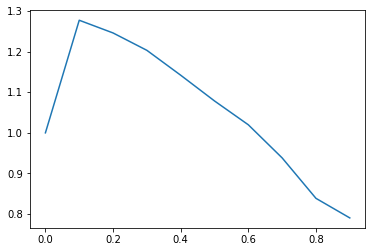

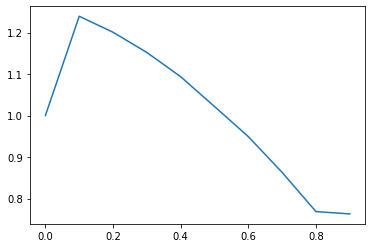

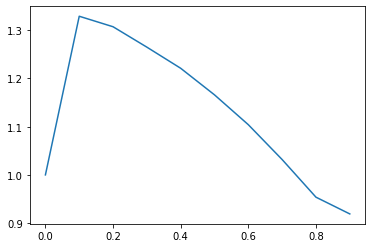

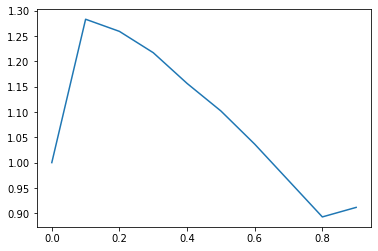

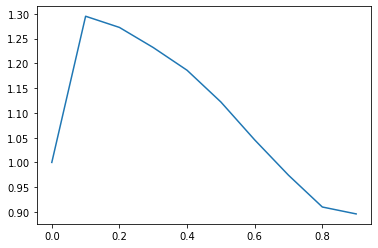

In [54]:
B = 5
alphas = [i*0.1 for i in range(10)]
for i in range(B):
    
    print('B is ' + str(i))
    bootstrapped_individuals = get_bootstrapped_individuals()
    empirical_fdrs = get_empirical_fdr(bootstrapped_individuals)
    
    plt.figure()
    plt.plot(alphas, empirical_fdrs)
    print(empirical_fdrs)
plt.show()    